Deep Learning
=============

Assignment 3
------------

Previously in `2_fullyconnected.ipynb`, you trained a logistic regression and a neural network model.

The goal of this assignment is to explore regularization techniques.

In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
import math

First reload the data we generated in _notmist.ipynb_.

In [182]:
pickle_file = 'notMNIST.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  valid_dataset = save['valid_dataset']
  valid_labels = save['valid_labels']
  test_dataset = save['test_dataset']
  test_labels = save['test_labels']
  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_labels.shape)
  print('Validation set', valid_dataset.shape, valid_labels.shape)
  print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)


Reformat into a shape that's more adapted to the models we're going to train:
- data as a flat matrix (Nx784)
- labels as float 1-hot encodings (Nx10)

In [183]:
image_size = 28
num_labels = 10

def reformat(dataset, labels):
  dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
  # Map 2 to [0.0, 1.0, 0.0 ...], 3 to [0.0, 0.0, 1.0 ...]
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  return dataset, labels

train_dataset_1h, train_labels_1h = reformat(train_dataset, train_labels)
valid_dataset_1h, valid_labels_1h = reformat(valid_dataset, valid_labels)
test_dataset_1h, test_labels_1h = reformat(test_dataset, test_labels)
print('Training set-1H', train_dataset_1h.shape, train_labels_1h.shape)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set-1H', valid_dataset_1h.shape, valid_labels_1h.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set-1H', test_dataset_1h.shape, test_labels_1h.shape)
print('Test set', test_dataset.shape, test_labels.shape)


Training set-1H (200000, 784) (200000, 10)
Training set (200000, 28, 28) (200000,)
Validation set-1H (10000, 784) (10000, 10)
Validation set (10000, 28, 28) (10000,)
Test set-1H (10000, 784) (10000, 10)
Test set (10000, 28, 28) (10000,)


---
Problem 1
---------

Introduce and tune L2 regularization for both logistic and neural network models. Remember that L2 amounts to adding a penalty on the norm of the weights to the loss. In TensorFlow, you can compute the L2 loss for a tensor `t` using `nn.l2_loss(t)`. The right amount of regularization should improve your validation / test accuracy.

---

### Logistic Regression and Regularization

In [4]:
# From Assignment 1
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

def LR_train(n_samples, C, train_ds, train_lbl, test_ds, test_lbl):

    Xtrain = np.array(train_ds[0:n_samples,:,:])
    Xtrain = np.reshape(Xtrain, (n_samples,784))
    ytrain = np.reshape(train_lbl[0:n_samples], (n_samples,))
    logreg = LogisticRegression(C=C,solver='sag', multi_class='ovr')
    #gauss_wgts = np.random.normal(loc=0, scale=0.2, size=n_samples)
    logreg.fit(Xtrain, ytrain)
    
    testX = np.reshape(test_ds, (len(test_ds), 784))
    ypred = logreg.predict(testX)
    
    yresp = np.reshape(test_lbl, (len(test_lbl,)))
    
    return metrics.accuracy_score(yresp, ypred)   

In [5]:
print(LR_train(1000, .09, train_dataset, train_labels, test_dataset, test_labels))

0.854


/home/anna/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:267: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [6]:
accuracy_scores = []
for c_val in np.arange(0.001, 1.0, .005):
    #print(c_val)    
    acc = LR_train(1000, c_val, train_dataset, train_labels, test_dataset, test_labels)
    accuracy_scores.append(acc)


In [7]:
print('max accuracy', max(accuracy_scores))
print('index',accuracy_scores.index(max(accuracy_scores)))
print(np.arange(.001,1.0,.005)[0:8])
print(accuracy_scores[0:8])

max accuracy 0.8599
index 5
[ 0.001  0.006  0.011  0.016  0.021  0.026  0.031  0.036]
[0.82550000000000001, 0.85219999999999996, 0.85699999999999998, 0.85880000000000001, 0.85970000000000002, 0.8599, 0.85950000000000004, 0.85860000000000003]


In [8]:
accuracy_scores_1 = []
for c_val in np.arange(0.021, .032, .0001):
    #print(c_val)    
    acc = LR_train(1000, c_val, train_dataset, train_labels, test_dataset, test_labels)
    accuracy_scores_1.append(acc)

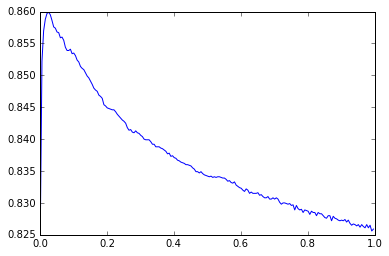

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(.001, 1.0, .005), accuracy_scores)

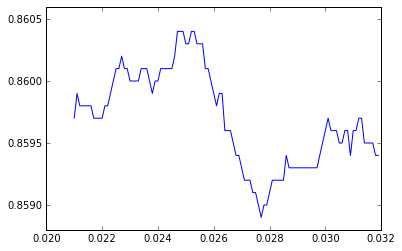

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(.021, .032, .0001), accuracy_scores_1)

In [14]:
print('max accuracy', max(accuracy_scores_1))
print('index',accuracy_scores_1.index(max(accuracy_scores_1)))
print(np.arange(.021,.032,.0001)[30:40])
print(accuracy_scores_1[30:40])

max accuracy 0.8604
index 37
[ 0.024   0.0241  0.0242  0.0243  0.0244  0.0245  0.0246  0.0247  0.0248
  0.0249]
[0.85999999999999999, 0.86009999999999998, 0.86009999999999998, 0.86009999999999998, 0.86009999999999998, 0.86009999999999998, 0.86019999999999996, 0.86040000000000005, 0.86040000000000005, 0.86040000000000005]


### NN Training and Regularization

##### Set high-level variables

In [202]:
batch_size=128
IMAGE_PIXELS=28*28
hidden1_units=1024
hidden2_units=1024
hidden3_units=1024
NUM_CLASSES=10
learning_rate = 0.5
max_steps = 3001

##### Build the Graph
Questions:  
* ** eval_correct: ** Set up eval_correct tensor to call in order to periodically evalulate againstt my validation set.  What gets execcuted in the graph when I do this?  Is it just simply comparing the calculated logits against the responses?  Or is it now using the validated set to continue training the graph?
* ** tensor states: ** How to peer into each tensor to view it's values?  How to construct breakpoints in the midst of processing to look at individual tensors.
* ** train_prediction: ** I created this when running the training data thru the loop and then calculating the prediction based on weights.  However if I run my validation sets thru this, am I calculating a train_prediction as well with the validation set?  How does the graph know not to adjust the weights for this round?
* **placeholder_labels and placeholder_labels_int: ** kludge-y
* **eval section:** When I use these tensors to check accuracy across entire test set, I noticed that it does not run the logits through the softmax.  Shouldn't it?  It seems that the predictions should always go thru the Softmax?


In [16]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

In [17]:
def placeholder_inputs():
    # Originally set the shape for each of these to specifically use batch_size for # rows
    # This caused problems when I wanted to run the entire test set to get an accuracy score
    # because batch_size was 128 and the test set dimension was much larger (10000, 784)
    # then I saw that the tutorial used None instead and that worked for everything
 
    images_placeholder     =tf.placeholder(tf.float32, shape=(None, IMAGE_PIXELS))
    labels_placeholder     =tf.placeholder(tf.float32, shape=(None, NUM_CLASSES))
    labels_placeholder_int =tf.placeholder(tf.int32, shape=(None)) 
    
    return images_placeholder, labels_placeholder, labels_placeholder_int

In [214]:
def feed_forward(images_placeholder, dropout):
    
    with tf.name_scope('hidden1') as scope:
        weights = tf.Variable(tf.truncated_normal([IMAGE_PIXELS, hidden1_units], 
            stddev=1.0 / math.sqrt(float(IMAGE_PIXELS))), name='weights')
        biases = tf.Variable(tf.zeros([hidden1_units]), name = 'biases')
        hidden1 = tf.nn.relu(tf.matmul(images_placeholder, weights) + biases)
        l2reg_1 = tf.nn.l2_loss(weights)
        
    with tf.name_scope('hidden2') as scope:
        weights = tf.Variable(tf.truncated_normal([hidden1_units, hidden2_units],
            stddev=1.0 / math.sqrt(float(hidden1_units))), name='weights')
        biases = tf.Variable(tf.zeros([hidden2_units]), name='biases')
        hidden2 = tf.nn.relu(tf.matmul(hidden1, weights) + biases)
        l2reg_2 = tf.nn.l2_loss(weights)
        
    #with tf.name_scope('hidden3') as scope:
    #    weights = tf.Variable(tf.truncated_normal([hidden2_units, hidden3_units],
    #        stddev=1.0 / math.sqrt(float(hidden2_units))), name='weights')
    #    biases = tf.Variable(tf.zeros([hidden3_units]), name='biases')
    #    hidden3 = tf.nn.relu(tf.matmul(hidden2, weights) + biases)
    #    l2reg_3 = tf.nn.l2_loss(weights)

    with tf.name_scope('softmax_linear') as scope:
        weights = tf.Variable(tf.truncated_normal([hidden2_units, NUM_CLASSES],
            stddev=1.0 / math.sqrt(float(hidden2_units))),name='weights')
        biases = tf.Variable(tf.zeros([NUM_CLASSES]),name='biases')
        l2reg_3 = tf.nn.l2_loss(weights)
        
        logits = tf.matmul(hidden2, weights) + biases        
        if dropout == True:
            logits = tf.nn.dropout(logits, 0.5)       
        
            
    return logits, l2reg_1 + l2reg_2 + l2reg_3
      

In [19]:
def evaluation(logits, labels_placeholder, labels_placeholder_int):
    # Should be (NxNUM_CLASSES)
    
    # Gets the index of the largest value across the tensor, test_a is prediction, test_b is response
    pred = tf.argmax(logits,1)
    resp = tf.argmax(labels_placeholder,1)
    # Boolean tensor
    correct_prediction = tf.equal(resp, pred)
    # Get mean across tensor, ie sum/length
    eval_acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    # in_top_k requires labels_placeholder to be int32 or int64 list
    correct = tf.nn.in_top_k(logits, labels_placeholder_int, 1)
    eval_correct = tf.reduce_sum(tf.cast(correct, tf.int32))    
    
    return(eval_acc, eval_correct)

In [20]:
def fill_feed_dict(dataset, labels, labels_int, images_placeholder, labels_placeholder, labels_placeholder_int):
    feed_dict = {
        images_placeholder : dataset,
        labels_placeholder : labels,
        labels_placeholder_int : labels_int
    }
    
    return feed_dict
    

In [197]:
def inference(l2_hyp, dropout = False):
    l2_hyperparm = l2_hyp #.0011
    graphn = tf.Graph()

    with graphn.as_default():
        # Inputs and PLACEHOLDERS
        images_placeholder, labels_placeholder, labels_placeholder_int = placeholder_inputs()
   
        # INFERENCE
        logits, l2reg = feed_forward(images_placeholder, dropout)
        
        # LOSS
        # softmax_cross_entropy needs labels_placeholder to be float32 1hot encoded
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, labels_placeholder))
        loss = loss + (l2_hyperparm * l2reg)
    
        # TRAINING
        global_step = tf.Variable(0, name='global_step', trainable=False)
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train_op = optimizer.minimize(loss, global_step=global_step)
        train_prediction = tf.nn.softmax(logits)
    
        # EVAL (use either eval_acc op or the eval_correct op)
        eval_acc, eval_correct = evaluation(logits, labels_placeholder, labels_placeholder_int)
        
    with tf.Session(graph=graphn) as session:
        init = tf.initialize_all_variables().run()
    
        for step in xrange(max_steps):
            # Generates the starting index from train_dataset to extract the minibatch
            offset = (step * batch_size) % (train_labels.shape[0] - batch_size)        
            feed_dict = fill_feed_dict(train_dataset_1h[offset:(offset + batch_size), :], train_labels_1h[offset:(offset + batch_size), :],
                train_labels[offset:(offset + batch_size)], images_placeholder, labels_placeholder, labels_placeholder_int)
            # A) The fact that I only feed it labels_placeholder and not labels_placeholder_int?
            _, l, predictions, num_correct = session.run([train_op, loss, train_prediction, eval_correct], feed_dict=feed_dict)  
       
            if (step % 500 == 0):
                print("Minibatch loss at step %d: %f" % (step, l))
                print("Minibatch accuracy: %.1f%%" % accuracy(predictions, train_labels_1h[offset:(offset + batch_size), :]))
                # Evaluate the entire dataset in specified batch-size increments, return all predictions
                acc, eval_predictions = do_validation_eval(session,eval_correct, images_placeholder,labels_placeholder,labels_placeholder_int)
                print("Validation accuracy: %4.6f" %(acc))
    
        fdict = fill_feed_dict(test_dataset_1h, test_labels_1h, test_labels, images_placeholder, labels_placeholder, labels_placeholder_int)
        loss, eval_correct, test_acc = session.run([loss, eval_correct, eval_acc], feed_dict=fdict)
        print('Test dataset accuracy %4.2f%%' %(100*eval_correct/float(len(test_dataset))))  
        
    return 100*eval_correct/float(len(test_dataset))
        

##### Training Loop
Questions:
* **feed_dict:** See A) comment above. What does it mean if I don't include one of the placeholders in the graph?  Seems like that tensor just does not get called?  If I call that tensor, I have to includ the right placeholder or it chokes
* ** Mini batches:** When it is appropriate to do mini-batches?  Is that just for training?  What if I just want to simply predict (and evaluate)?  Why do I need to do this as a mini-batch?
* **train vs. test**: How does the graph know when you are training it to update weights, vs just feeding it a data set to calculate accuracy (and not change weights or bias values)?  Would you ever want to push the test data into smaller batch sizes?  In the exmaple below, I did not do that... Is it that if you don't call the train_op vector which tries to minimize loss which would then update the weights and biases?  But when I removed that from my final test run, I did not notice any difference in errors from when I did call for loss.
* **Graph 'hierarchy'**: Acc to video, leaf nodes learn edges, middle layer learns high order features (like geom. shapes) and then even higher order objects themselves (like a face or face of cat).  What would "audit logs" or text look like?
* **Amount of data**: How much data do I need to train our NN?
* **Regularization and Loss**: One layer vs. Two layers

Note:  
* Validation accuracy: 89.703526 and Test dataset accuracy 95.09% without L2 Regularization (2 hidden layers)
* Validation accuracy: 88.631811 and Test dataset accuracy 94.21% (1 hidden layer)
* With 6e-10 regularization hyperparameter, test accuracy only improved 94.24

In [22]:
def do_validation_eval(session, eval_correct, images_placeholder, labels_placeholder, labels_placeholder_int):
    true_count = 0  # Counts the number of correct predictions.
    steps_per_epoch = valid_dataset.shape[0] // batch_size
    num_examples = steps_per_epoch * batch_size
    eval_predictions = []
    for step in xrange(steps_per_epoch):
        eval_offset = (step * batch_size) % (valid_labels.shape[0] - batch_size)
        f_dict = fill_feed_dict(valid_dataset_1h[eval_offset:(eval_offset + batch_size), :], valid_labels_1h[eval_offset:(eval_offset + batch_size), :], 
            valid_labels[eval_offset:(eval_offset + batch_size)], images_placeholder, labels_placeholder, labels_placeholder_int)
        eval_predictions += session.run([eval_correct], feed_dict=f_dict)

    return 100*sum(eval_predictions)/float(num_examples), eval_predictions

In [42]:
predacc_scores = []
for multiplier in range(0, 26):
    beta = 1e-10 * (2*multiplier)
    print('BETA value:', beta)
    predacc_scores.append((beta, inference(beta)))

BETA value: 0.0
Minibatch loss at step 0: 2.360609
Minibatch accuracy: 5.5%
Validation accuracy: 38.561699
Minibatch loss at step 500: 0.486144
Minibatch accuracy: 90.6%
Validation accuracy: 84.915865
Minibatch loss at step 1000: 0.327002
Minibatch accuracy: 90.6%
Validation accuracy: 86.177885
Minibatch loss at step 1500: 0.453064
Minibatch accuracy: 89.1%
Validation accuracy: 87.239583
Minibatch loss at step 2000: 0.277680
Minibatch accuracy: 91.4%
Validation accuracy: 87.550080
Minibatch loss at step 2500: 0.366509
Minibatch accuracy: 88.3%
Validation accuracy: 87.900641
Minibatch loss at step 3000: 0.264751
Minibatch accuracy: 91.4%
Validation accuracy: 88.752003
Test dataset accuracy 94.16%
BETA value: 2e-10
Minibatch loss at step 0: 2.371467
Minibatch accuracy: 9.4%
Validation accuracy: 45.072115
Minibatch loss at step 500: 0.481893
Minibatch accuracy: 89.1%
Validation accuracy: 84.605369
Minibatch loss at step 1000: 0.332284
Minibatch accuracy: 90.6%
Validation accuracy: 85.5769

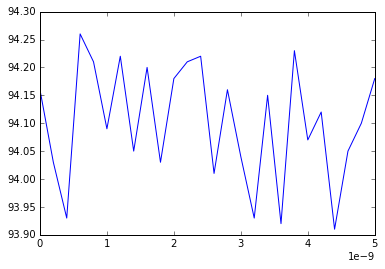

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([beta for beta,_ in predacc_scores], [acc for beta, acc in predacc_scores])

In [44]:
l = [acc for beta, acc in predacc_scores]
print(predacc_scores[l.index(max(l))])

(6e-10, 94.260000000000005)


---
Problem 2
---------
Let's demonstrate an extreme case of overfitting. Restrict your training data to just a few batches. What happens?

---
* 300 training samples total (repeated over and over) with more features (ie 784).
* Minibatch Training accuracy reaches 100%
* However testing accuracy and validation quite a bit lower (why is testing accuracy consistently higher than validation?)

In [179]:
# Current Training set sizes
print('Training set-1H', train_dataset_1h.shape, train_labels_1h.shape)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set-1H', valid_dataset_1h.shape, valid_labels_1h.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set-1H', test_dataset_1h.shape, test_labels_1h.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set-1H (300, 784) (300, 10)
Training set (300, 28, 28) (300,)
Validation set-1H (10000, 784) (10000, 10)
Validation set (10000, 28, 28) (10000,)
Test set-1H (10000, 784) (10000, 10)
Test set (10000, 28, 28) (10000,)


In [178]:
# Reduce Training set sizes to just 300 to force OVERFITTING
train_dataset_1h = train_dataset_1h[0:300]
train_dataset = train_dataset[0:300]
train_labels_1h = train_labels_1h[0:300]
train_labels = train_labels[0:300]

In [180]:
inference(6e-10, False)

Minibatch loss at step 0: 2.266426
Minibatch accuracy: 11.7%
Validation accuracy: 40.665064
Minibatch loss at step 500: 0.001863
Minibatch accuracy: 100.0%
Validation accuracy: 75.961538
Minibatch loss at step 1000: 0.000626
Minibatch accuracy: 100.0%
Validation accuracy: 76.001603
Minibatch loss at step 1500: 0.000345
Minibatch accuracy: 100.0%
Validation accuracy: 75.941506
Minibatch loss at step 2000: 0.000230
Minibatch accuracy: 100.0%
Validation accuracy: 75.991587
Minibatch loss at step 2500: 0.000171
Minibatch accuracy: 100.0%
Validation accuracy: 76.011619
Minibatch loss at step 3000: 0.000142
Minibatch accuracy: 100.0%
Validation accuracy: 76.041667
Test dataset accuracy 83.35%


83.349999999999994

---
Problem 3
---------
Introduce Dropout on the hidden layer of the neural network. Remember: Dropout should only be introduced during training, not evaluation, otherwise your evaluation results would be stochastic as well. TensorFlow provides `nn.dropout()` for that, but you have to make sure it's only inserted during training.

What happens to our extreme overfitting case?

---
* Training accuracy per minibatch is lower with dropouts
* However Validation accuracy increased 5-6 percentage points from previous run
* Testing accuracy also improved 

In [181]:
inference(6e-06, True)

Minibatch loss at step 0: 2.397096
Minibatch accuracy: 8.6%
Validation accuracy: 27.744391
Minibatch loss at step 500: 0.859668
Minibatch accuracy: 58.6%
Validation accuracy: 81.510417
Minibatch loss at step 1000: 0.871901
Minibatch accuracy: 57.0%
Validation accuracy: 81.810897
Minibatch loss at step 1500: 0.778105
Minibatch accuracy: 58.6%
Validation accuracy: 82.081330
Minibatch loss at step 2000: 0.855699
Minibatch accuracy: 57.8%
Validation accuracy: 81.750801
Minibatch loss at step 2500: 0.786091
Minibatch accuracy: 58.6%
Validation accuracy: 82.271635
Minibatch loss at step 3000: 0.950642
Minibatch accuracy: 53.1%
Validation accuracy: 82.231571
Test dataset accuracy 86.99%


86.989999999999995

---
Problem 4
---------

Try to get the best performance you can using a multi-layer model! The best reported test accuracy using a deep network is [97.1%](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html?showComment=1391023266211#c8758720086795711595).

One avenue you can explore is to add multiple layers.

Another one is to use learning rate decay:

    global_step = tf.Variable(0)  # count the number of steps taken.
    learning_rate = tf.train.exponential_decay(0.5, global_step, ...)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
 
 ---
Not sure if this is right:
- 1) Add new hidden layer
- 2) Add L2 regularization weights to the total weights
- 3) Find optimal L2 (no drop-out)

In [187]:
# 1 hidden layers with no drop-out and previous regularization (94.18%)
inference(6e-06)

Minibatch loss at step 0: 2.345007
Minibatch accuracy: 9.4%
Validation accuracy: 42.317708
Minibatch loss at step 500: 0.487481
Minibatch accuracy: 89.8%
Validation accuracy: 85.026042
Minibatch loss at step 1000: 0.364757
Minibatch accuracy: 89.1%
Validation accuracy: 86.107772
Minibatch loss at step 1500: 0.440881
Minibatch accuracy: 89.1%
Validation accuracy: 87.359776
Minibatch loss at step 2000: 0.296254
Minibatch accuracy: 91.4%
Validation accuracy: 87.850561
Minibatch loss at step 2500: 0.354589
Minibatch accuracy: 89.1%
Validation accuracy: 87.910657
Minibatch loss at step 3000: 0.260303
Minibatch accuracy: 92.2%
Validation accuracy: 88.822115
Test dataset accuracy 94.18%


94.180000000000007

#### Optimize  L2 regularization (no drop-out)

In [215]:
predacc_scores_1 = []
for exponent in range(0, 10):
    beta = 1e-10 * math.pow(10, exponent)
    print('BETA value:', beta)
    predacc_scores_1.append((beta, inference(beta)))

BETA value: 1e-10
Minibatch loss at step 0: 2.337105
Minibatch accuracy: 3.9%
Validation accuracy: 35.526843
Minibatch loss at step 500: 0.429992
Minibatch accuracy: 90.6%
Validation accuracy: 85.126202
Minibatch loss at step 1000: 0.331128
Minibatch accuracy: 88.3%
Validation accuracy: 87.119391
Minibatch loss at step 1500: 0.425749
Minibatch accuracy: 89.8%
Validation accuracy: 87.950721
Minibatch loss at step 2000: 0.248364
Minibatch accuracy: 91.4%
Validation accuracy: 89.052484
Minibatch loss at step 2500: 0.279115
Minibatch accuracy: 91.4%
Validation accuracy: 89.513221
Minibatch loss at step 3000: 0.206842
Minibatch accuracy: 93.0%
Validation accuracy: 89.803686
Test dataset accuracy 95.04%
BETA value: 1e-09
Minibatch loss at step 0: 2.291290
Minibatch accuracy: 14.1%
Validation accuracy: 35.837340
Minibatch loss at step 500: 0.440145
Minibatch accuracy: 89.8%
Validation accuracy: 84.985978
Minibatch loss at step 1000: 0.349239
Minibatch accuracy: 85.9%
Validation accuracy: 87.1

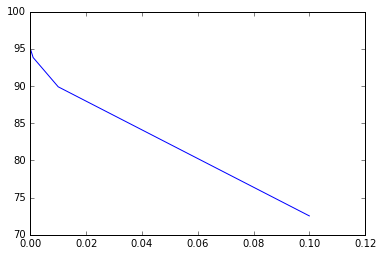

In [216]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([beta for beta,_ in predacc_scores_1], [acc for beta, acc in predacc_scores_1])

In [218]:
predacc_scores_1[0]

(1e-10, 95.040000000000006)

In [219]:
predacc_scores = []
for multiplier in range(0, 30):
    beta = 1e-11 * (4*multiplier)
    print('BETA value:', beta)
    predacc_scores.append((beta, inference(beta)))

BETA value: 0.0
Minibatch loss at step 0: 2.358450
Minibatch accuracy: 8.6%
Validation accuracy: 31.931090
Minibatch loss at step 500: 0.439507
Minibatch accuracy: 88.3%
Validation accuracy: 84.905849
Minibatch loss at step 1000: 0.348553
Minibatch accuracy: 89.1%
Validation accuracy: 87.029247
Minibatch loss at step 1500: 0.436517
Minibatch accuracy: 90.6%
Validation accuracy: 88.251202
Minibatch loss at step 2000: 0.227681
Minibatch accuracy: 91.4%
Validation accuracy: 89.082532
Minibatch loss at step 2500: 0.302277
Minibatch accuracy: 90.6%
Validation accuracy: 89.493189
Minibatch loss at step 3000: 0.188560
Minibatch accuracy: 93.8%
Validation accuracy: 89.693510
Test dataset accuracy 94.95%
BETA value: 4e-11
Minibatch loss at step 0: 2.350454
Minibatch accuracy: 6.2%
Validation accuracy: 34.294872
Minibatch loss at step 500: 0.441466
Minibatch accuracy: 89.8%
Validation accuracy: 85.096154
Minibatch loss at step 1000: 0.335179
Minibatch accuracy: 88.3%
Validation accuracy: 86.9991

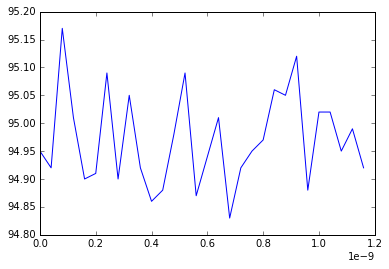

In [220]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([beta for beta,_ in predacc_scores], [acc for beta, acc in predacc_scores])

In [221]:
l = [acc for beta, acc in predacc_scores]
predacc_scores[l.index(max(l))]

(8e-11, 95.170000000000002)

In [222]:
inference(8e-11, True)

Minibatch loss at step 0: 2.305056
Minibatch accuracy: 11.7%
Validation accuracy: 19.290865
Minibatch loss at step 500: 1.129877
Minibatch accuracy: 59.4%
Validation accuracy: 84.034455
Minibatch loss at step 1000: 1.075351
Minibatch accuracy: 55.5%
Validation accuracy: 84.975962
Minibatch loss at step 1500: 1.132594
Minibatch accuracy: 56.2%
Validation accuracy: 87.389824
Minibatch loss at step 2000: 1.071026
Minibatch accuracy: 50.0%
Validation accuracy: 88.151042
Minibatch loss at step 2500: 0.994586
Minibatch accuracy: 59.4%
Validation accuracy: 88.741987
Minibatch loss at step 3000: 1.087952
Minibatch accuracy: 46.1%
Validation accuracy: 88.321314
Test dataset accuracy 93.97%


93.969999999999999

In [223]:
inference(8e-11, False)

Minibatch loss at step 0: 2.287638
Minibatch accuracy: 19.5%
Validation accuracy: 31.550481
Minibatch loss at step 500: 0.420660
Minibatch accuracy: 89.8%
Validation accuracy: 85.076122
Minibatch loss at step 1000: 0.347805
Minibatch accuracy: 89.1%
Validation accuracy: 87.329728
Minibatch loss at step 1500: 0.423977
Minibatch accuracy: 89.8%
Validation accuracy: 88.070913
Minibatch loss at step 2000: 0.247268
Minibatch accuracy: 89.8%
Validation accuracy: 88.982372
Minibatch loss at step 2500: 0.300120
Minibatch accuracy: 92.2%
Validation accuracy: 89.543269
Minibatch loss at step 3000: 0.204729
Minibatch accuracy: 93.0%
Validation accuracy: 89.633413
Test dataset accuracy 94.97%


94.969999999999999